# CS-141 Homework 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# from matplotlib.patches import Ellipse

%load_ext autoreload
%autoreload 2
%autosave 180

Autosaving every 180 seconds


In [2]:
def plot_ellipse(cov, center, t):
    """ 
    Plot an ellipse based on a covariance matrix in matplotlib
    Inputs: covariance matrix, center
    Outputs: plotted ellipse
    """
    eig_vals, eig_vect = np.linalg.eig(cov)
    # print("\n Eigenvalues \n",eig_vals)
    # print("\n Eigenvectors \n",eig_vect)

    # lamdax = eig_vals[0]
    # lamday = eig_vals[1]

    # Get smallest and largest eigenvectors/values
    max_ind = np.argmax(eig_vals) # USE ABSOLUTE VALUE?
    # print("\n Max eig value indice =", max_ind)
    max_EV = eig_vect[:,max_ind]
    max_eval = np.max(eig_vals)
    min_eval = np.min(eig_vals)

    # Do we need these ??
    lamdax = eig_vals[0]
    lamday = eig_vals[1]

    if max_ind == 0:
        min_EV = eig_vect[:,1]
    else:
        min_EV = eig_vect[:,0]
    
    # print("\n Max eig vector = ", max_EV)
    # print("\n Min eig vector = ", min_EV)
    # print("\n Max eig val = ", max_eval)
    # print("\n Min eig val = ", min_eval)
    
    # Major and minor axes
    maj_len = 2*np.sqrt(lamdax)
    min_len = 2*np.sqrt(lamday)
    
    # Angle between x-axis and largest eigenvector
    angle = np.arctan2(max_EV[1], max_EV[0])
    if angle < 0: angle += 2*np.pi
    # print("\n Angle between x-axis and largest EV = ", angle)

    # Mean data coords
    center = center
    chi_sq = 1

    a = chi_sq * np.sqrt(max_eval)
    b = chi_sq * np.sqrt(min_eval)
    theta = np.linspace(0, 2*np.pi, 1000);
    pts_x = np.array(a * np.cos(theta))
    pts_y = np.array(b * np.sin(theta))
    pts_tot = np.vstack([pts_x, pts_y])
    # print(pts_tot)
    pts_tot = pts_tot.T

    # Rotation matrix 
    R = [[np.cos(angle), np.sin(angle)],[-np.sin(angle), np.cos(angle)]]
    # print(R)
    r_ellipse = pts_tot @ R
    # print(r_ellipse)

    plt.plot(r_ellipse[:,0] + center[0], r_ellipse[:,1] + center[1], label = t)

    # Define the ellipse
    # ellipse = Ellipse(center, r_ellipse[:,0], r_ellipse[:,1], angle=angle, edgecolor='blue', facecolor='none')
    # ax.add_patch(ellipse)

    return ax

In [3]:
def kalman_filter_pred(A, B, R, state_prev, post_prev):
    """ Simulates Kalman filter prediction steps: ALGORITHM LINES 2-3
    Assumptions: deltaT = 1, system starts at REST, acceleration N~(0,1)
    Input: A, B, R matrices, previous state and posterior
    Output: predicted states, covariance, and acceleration for current state
    """

    # Random sample acceleration
    u_t = np.random.normal(0, 1, size=(1,1))
    acc = u_t.item()

    # State prediction 
    state_new_p = A @ state_prev + B @ u_t

    # Posterior 
    post_new_p = A @ post_prev @ A.T + R

    return state_new_p, post_new_p, acc


 States from t=0 to t=5 
 [[0.         0.33563828 1.55346807 3.63349776 5.09796145 5.66462814]
 [0.         0.67127656 1.76438303 2.39567635 0.53325102 0.60008237]]

 Posterior over x and x_dot 
 [[ 0.    0.    0.25  0.5   2.5   2.    8.75  4.5  21.    8.   41.25 12.5 ]
 [ 0.    0.    0.5   1.    2.    2.    4.5   3.    8.    4.   12.5   5.  ]]

 Accelerations t=0 to t=5 
 [0, 0.6712765578217841, 1.0931064690958714, 0.6312933265613392, -1.8624253352537146, 0.06683135442818737]


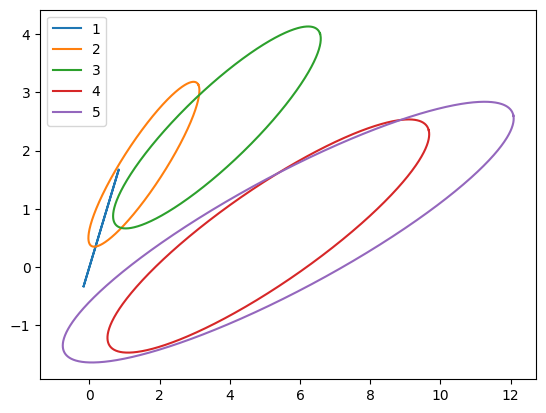

In [4]:
# Question 1.3: Implement state prediction step of Kalman filter

# Assume at t=0, pos, vel, and accel = 0
# Calculate state disrtibution for times t = 1,2,...,5

# Time settings
dt = 1 # Assume delta t is 1 second
t_total = 5 # Total time in seconds
t_steps = int(t_total/dt) # Time steps 

muh_a = 0 # avg accel
sigma_a = 1 

# State transition, linear matrices A and B
A = np.array([[1, dt], [0, 1]])
B = np.array([[.5*dt**2], [dt]])
R = sigma_a * np.array([[.25, .5],[.5, 1]])

# Initialize resting state 
x_0 = np.array([[0],[0]])
cov_0 = np.array([[0, 0],[0, 0]])

# Create a state vector for number of time steps t
states = [x_0]
posts = [cov_0]
accs = [0]

# Create a plot to display axes
plt.figure()
ax = plt.gca()

# For times t=1,2, ..., 5
for i in range(1,t_steps+1):
    # Previous states
    state_prev = states[-1]
    post_prev = posts[-1]
    
    # Generate state prediction and distribution using Kalman algorithm 
    state_new_p, post_new_p, acc = kalman_filter_pred(A, B, R, state_prev, post_prev)

    # Plot an ellipse representing covariance 
    ax = plot_ellipse(post_new_p, state_new_p, i)
    
    # Add state prediction, posterior, and accel
    states.append(state_new_p)
    posts.append(post_new_p)
    accs.append(acc)

states = np.hstack(states)
posts = np.hstack(posts)

print("\n States from t=0 to t=5 \n",states)
print("\n Posterior over x and x_dot \n",posts)
print("\n Accelerations t=0 to t=5 \n",accs)

plt.legend(loc="upper left")
plt.show()

In [ ]:
# Question 1.3: Implement state prediction step of Kalman filter

# Assume at t=0, pos, vel, and accel = 0
# Calculate state disrtibution for times t = 1,2,...,5

# Time settings
dt = 1 # Assume delta t is 1 second
t_total = 5 # Total time in seconds
t_steps = int(t_total/dt) # Time steps 

# Initialize resting state 
x_0 = np.array([[0],[0]])
cov_0 = np.array([[0, 0],[0, 0]])

# Create a state vector for number of time steps t
states = [x_0]
posts = [cov_0]
accs = [0]

muh_a = 0 # avg accel
sigma_a = 1 

# State transition 
# Linear matrices A and B
A = np.array([[1, dt], [0, 1]])
B = np.array([[.5*dt**2], [dt]])
R = sigma_a * np.array([[.25, .5],[.5, 1]])
# print(R)

t = 0

# Create a plot for ellipses
plt.figure()
ax = plt.gca()

for i in range(1, t_steps+1):
    # Random sample for accel using normal dist
    u_t = np.random.normal(muh_a, sigma_a, size=(1,1))
    accs.append(u_t.item())
    # State prediction 
    state_new = A @ states[-1] + B @ u_t
    # print(state_new)

    # Posterior 
    post_new = A @ posts[-1] @ A.T + R
    # print(post_new)

    ax = plot_ellipse(post_new, state_new, i)

    # Add state prediction and posterior 
    states.append(state_new)
    posts.append(post_new)

states = np.hstack(states)
posts = np.hstack(posts)

print("\n States from t=0 to t=5 \n",states)
print("\n Posterior over x and x_dot \n",posts)
print("\n Accelerations t=0 to t=5 \n",accs)


# Set the limits of the plot
# ax.set_xlim(-10, 10)
# ax.set_ylim(-10, 10)
# ax.set_aspect('equal')
plt.legend(loc="upper left")
plt.show()

# Part 2

In [17]:
def kalman_filter_prob2_2_GPS(A, B, C, Q, R, state_prev, post_prev, t):
    """ ONLY FOR PROBLEM 2.2: ASKS FOR A MEASUREMENT OF 10 at TIME T=5
    Simulates Kalman filter prediction and measurement update steps: ALGORITHM LINES 2-6
    Assumptions: deltaT = 1, system starts at REST, acceleration N~(0,1)
    Input: A, B, C, Q, R matrices, previous state and posterior, GPS sensor probability
    Output: updated state prediction, covariance, and acceleration for current state
    """

    # PREDICTION STEPS: LINES 2-3
    # Random sample for accel using normal dist
    u_t = np.random.normal(0, 1, size=(1,1))
    acc = u_t.item()
    
    # State prediction 
    state_new_p = A @ state_prev + B @ u_t

    # Posterior 
    post_new_p = A @ post_prev @ A.T + R

    # MEASURMENT UPDATE STEPS: LINES 4-6
    # Only happens at time t = 5
    if t == 5:
        print("\n State prediction before measurement at t=5 \n", state_new_p, "\n")
        # print("\n Posterior before measurement \n", post_new_p)
        # Sample TRUE POSITION - 10 in this case
        z_t = np.array([[10]])
        print("\n Sensor reading = ", z_t, "\n")
        
        # Kalman gain 
        K_t = post_new_p @ C.T @ np.linalg.inv(C @ post_new_p @ C.T + Q) 
        # print("\n Kalman gain \n",K_t)

        # State update
        # print("\n checkpoint1 = ", z_t - C @ state_new_p)
        # print("\n checkpoint2 = ", K_t@(z_t - C @ state_new_p))
        state_new = state_new_p + K_t @ (z_t - C @ state_new_p)
        print("\n New state \n", state_new)

        # Covariance update 
        post_new = (np.eye(2) - K_t @ C) @ post_new_p
        # print("\n New posterior \n", post_new)
    else:
        # Add state prediction and posterior 
        state_new = state_new_p
        post_new = post_new_p


    return state_new, post_new, acc

In [18]:
def kalman_filter_randGPS(A, B, C, Q, R, state_prev, post_prev, GPS_prob):
    """ Simulates Kalman filter prediction and measurement update steps: ALGORITHM LINES 2-6
    Assumptions: deltaT = 1, system starts at REST, acceleration N~(0,1)
    Input: A, B, C, Q, R matrices, previous state and posterior, GPS sensor probability
    Output: updated state prediction, covariance, and acceleration for current state
    """

    # PREDICTION STEPS: LINES 2-3
    # Random sample for accel using normal dist
    u_t = np.random.normal(0, 1, size=(1,1))
    acc = u_t.item()
    
    # State prediction 
    state_new_p = A @ state_prev + B @ u_t

    # Posterior 
    post_new_p = A @ post_prev @ A.T + R

    # MEASURMENT UPDATE STEPS: LINES 4-6
    # First - if the GPS sensor 'works', get a measurement
    GPS_result = np.random.choice([True, False], p=[GPS_prob, 1-GPS_prob])
    # print(result)

    if GPS_result == True:
        print("\n State prediction before measurement \n", state_new_p, "\n")
        # print("\n Posterior before measurement \n", post_new_p)
        # Sample TRUE POSITION
        pos = np.array([[state_new_p[0,0]]])
        z_t = np.random.normal(pos, sigma_pos, size=(1,1))
        print("\n Sensor reading = ", z_t, "\n")
        
        # Kalman gain 
        K_t = post_new_p @ C.T @ np.linalg.inv(C @ post_new_p @ C.T + Q) 
        # print("\n Kalman gain \n",K_t)

        # State update
        # print("\n checkpoint1 = ", z_t - C @ state_new_p)
        # print("\n checkpoint2 = ", K_t@(z_t - C @ state_new_p))
        state_new = state_new_p + K_t @ (z_t - C @ state_new_p)
        print("\n New state \n", state_new)

        # Covariance update 
        post_new = (np.eye(2) - K_t @ C) @ post_new_p
        # print("\n New posterior \n", post_new)
    else:
        # Add state prediction and posterior 
        state_new = state_new_p
        post_new = post_new_p


    return state_new, post_new, acc, GPS_result


 State prediction before measurement 
 [[-10.7523785]
 [ -4.4069433]] 


 Sensor reading =  [[10]] 


 New state 
 [[6.62905527]
 [0.86015784]]

 States from t=0 to t=20 
 [[ 0.         -0.62570422 -1.92170152 -3.93304629 -6.91150241  6.62905527]
 [ 0.         -1.25140844 -1.34058616 -2.68210336 -3.27480888  0.86015784]]

 Posterior over x and x_dot 
 [[ 0.          0.          0.25        0.5         2.5         2.
   8.75        4.5        21.          8.          6.70050761  2.03045685]
 [ 0.          0.          0.5         1.          2.          2.
   4.5         3.          8.          4.          2.03045685  1.82741117]]

 Accelerations t=0 to t=20 
 [0, -1.251408441856491, -0.0891777231012962, -1.34151719590807, -0.592705519239454, -1.1321344208835433]


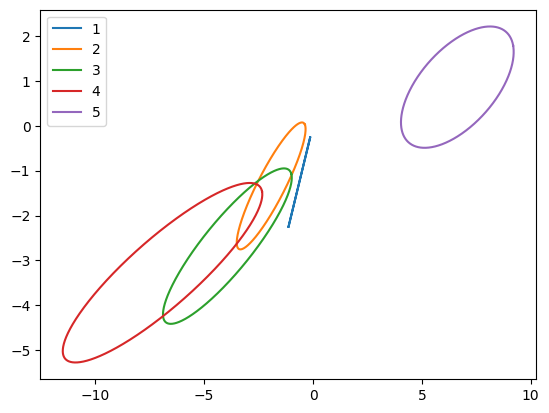

In [19]:
# Implement measurement update 

# Time settings
dt = 1 # Assume delta t is 1 second
t_total = 5 # Total time in seconds
t_steps = int(t_total/dt) # Time steps 

# Initialize resting state 
x_0 = np.array([[0],[0]])
cov_0 = ([0, 0],[0, 0])

# Create a state vector for number of time steps t
states = [x_0]
posts = [cov_0]
accs = [0]
GPS_results = []

muh_a = 0 # avg accel
sigma_a = 1 
sigma_pos = 8

# State transition 
# Linear matrices A and B
A = np.array([[1, dt], [0, 1]])
B = np.array([[.5*dt**2], [dt]])

# Implement C and Q matrices 
C = np.array([[1, 0]])
Q = np.array([[8]])

R = sigma_a * np.array([[.25, .5],[.5, 1]])
# print(R)

# Create plot
plt.figure()
ax = plt.gca()

for i in range(1, t_steps+1):

    # Initialize previous state
    state_prev = states[-1]
    post_prev = posts[-1]

    state_new, post_new, acc = kalman_filter_prob2_2_GPS(A, B, C, Q, R, state_prev, post_prev, i)
    
    # Add state prediction, posterior, accel, and GPS result
    states.append(state_new)
    posts.append(post_new)
    accs.append(acc)

    # Create a covariance ellipse
    ax = plot_ellipse(post_new, state_new, i)


states = np.hstack(states)
posts = np.hstack(posts)

print("\n States from t=0 to t=5 \n",states)
print("\n Posterior over x and x_dot \n",posts)
print("\n Accelerations t=0 to t=5 \n",accs)


plt.legend(loc="upper left")
plt.show()


 State prediction before measurement 
 [[-0.25428736]
 [-0.50857473]] 


 Sensor reading =  [[2.09799865]] 


 New state 
 [[-0.18300597]
 [-0.36601194]]

 State prediction before measurement 
 [[6.5597653 ]
 [1.19019194]] 


 Sensor reading =  [[23.6195975]] 


 New state 
 [[21.90288482]
 [ 5.05279546]]

 State prediction before measurement 
 [[ 5.36986883]
 [-1.189601  ]] 


 Sensor reading =  [[13.23584032]] 


 New state 
 [[12.44429602]
 [ 0.59137368]]

 State prediction before measurement 
 [[6.66685928]
 [1.40437991]] 


 Sensor reading =  [[-0.63086059]] 


 New state 
 [[ 0.10350116]
 [-0.24793402]]

 States from t=0 to t=20 
 [[0.         5.66462814 5.66462814 5.66462814 5.66462814 5.66462814]
 [0.         0.60008237 0.60008237 0.60008237 0.60008237 0.60008237]]

 Posterior over x and x_dot 
 [[ 0.    0.   41.25 12.5  41.25 12.5  41.25 12.5  41.25 12.5  41.25 12.5 ]
 [ 0.    0.   12.5   5.   12.5   5.   12.5   5.   12.5   5.   12.5   5.  ]]

 Accelerations t=0 to t=20 
 [0,

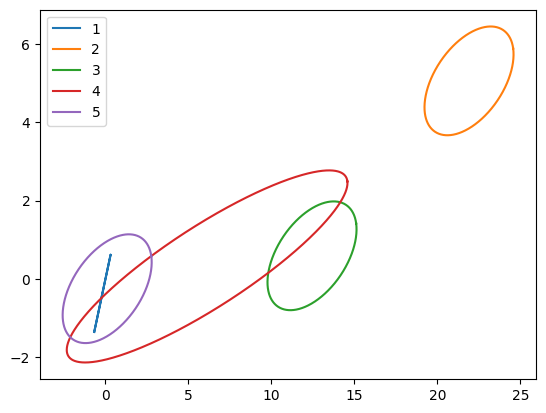

In [20]:
# Implement measurement update 

# GPS SENSOR PROBABILITY 
sensor_prob = 0.9 # 0.1, 0.5, OR 0.9 (OR 1 for problem 2.2)

# Time settings
dt = 1 # Assume delta t is 1 second
t_total = 5 # Total time in seconds
t_steps = int(t_total/dt) # Time steps 

# Initialize resting state 
x_0 = np.array([[0],[0]])
cov_0 = ([0, 0],[0, 0])

# Create a state vector for number of time steps t
states = [x_0]
posts = [cov_0]
accs = [0]
GPS_results = []

muh_a = 0 # avg accel
sigma_a = 1 
sigma_pos = 8

# State transition 
# Linear matrices A and B
A = np.array([[1, dt], [0, 1]])
B = np.array([[.5*dt**2], [dt]])

# Implement C and Q matrices 
C = np.array([[1, 0]])
Q = np.array([[8]])

R = sigma_a * np.array([[.25, .5],[.5, 1]])
# print(R)

# Create plot
plt.figure()
ax = plt.gca()

for i in range(1, t_steps+1):

    # Initialize previous state
    state_prev = states[-1]
    post_prev = posts[-1]

    state_new, post_new, acc, GPS_result = kalman_filter_randGPS(A, B, C, Q, R, state_prev, post_prev, sensor_prob)
    
    # Add state prediction, posterior, accel, and GPS result
    states.append(state_new_p)
    posts.append(post_new_p)
    accs.append(acc)
    GPS_results.append(GPS_result)

    # Create a covariance ellipse
    ax = plot_ellipse(post_new, state_new, i)


states = np.hstack(states)
posts = np.hstack(posts)

print("\n States from t=0 to t=20 \n",states)
print("\n Posterior over x and x_dot \n",posts)
print("\n Accelerations t=0 to t=20 \n",accs)
print("\n GPS results \n", GPS_results)

# # Set the limits of the plot
# # ax.set_xlim(-10, 10)
# # ax.set_ylim(-10, 10)
# # ax.set_aspect('equal')
plt.legend(loc="upper left")
plt.show()

In [ ]:
# Question 2.2: Implement measurement update 

# Assume at t=0, pos, vel, and accel = 0
# Calculate state disrtibution for times t = 1,2,...,5

# Time settings
dt = 1 # Assume delta t is 1 second
t_total = 5 # Total time in seconds
t_steps = int(t_total/dt) # Time steps 

# Initialize resting state 
x_0 = np.array([[0],[0]])
cov_0 = ([0, 0],[0, 0])


# Create a state vector for number of time steps t
states = [x_0]
posts = [cov_0]
accs = [0]

muh_a = 0 # avg accel
sigma_a = 1 
sigma_pos = 8

# State transition 
# Linear matrices A and B
A = np.array([[1, dt], [0, 1]])
B = np.array([[.5*dt**2], [dt]])

# Implement C and Q matrices 
C = np.array([[1, 0]])
Q = np.array([[8]])

R = sigma_a * np.array([[.25, .5],[.5, 1]])
# print(R)

t = 0

# Create plot
plt.figure()
ax = plt.gca()

for i in range(1, t_steps+1):
    # Random sample for accel using normal dist
    u_t = np.random.normal(muh_a, sigma_a, size=(1,1))
    accs.append(u_t.item())
    # State prediction 
    state_new_p = A @ states[-1] + B @ u_t
    # print(state_new)

    # Posterior 
    post_new_p = A @ posts[-1] @ A.T + R

    # IMPLEMENT MEASUREMENT - lines 4-6 KF
    if i == 5:
        print("\n State before measurement at t=5 \n", state_new_p)
        print("\n Posterior before measurement at t=5 \n", post_new_p)
        z_t = np.array([[10]])
        
        # Kalman gain 
        # tr = C @ post_new_p @ C.T + Q
        # print("\n checkpoint1 = ", tr)
        # print("\n checkpoint2 = ", np.linalg.inv(tr))
        K_t = post_new_p @ C.T @ np.linalg.inv(C @ post_new_p @ C.T + Q) 
        # print("\n Kalman gain \n",K_t)

        # State update
        # print("\n checkpoint1 = ", z_t - C @ state_new_p)
        # print("\n checkpoint2 = ", K_t@(z_t - C @ state_new_p))
        state_new = state_new_p + K_t @ (z_t - C @ state_new_p)
        print("\n New state \n", state_new)

        # Covariance update 
        post_new = (np.eye(2) - K_t @ C) @ post_new_p
        print("\n New posterior \n", post_new)
    else:
        # Add state prediction and posterior 
        state_new = state_new_p
        post_new = post_new_p

    
    states.append(state_new)
    posts.append(post_new)
        

    ax = plot_ellipse(post_new, state_new, i)

    

states = np.hstack(states)
posts = np.hstack(posts)

print("\n States from t=0 to t=5 \n",states)
print("\n Posterior over x and x_dot \n",posts)
print("\n Accelerations t=0 to t=5 \n",accs)


# # Set the limits of the plot
# # ax.set_xlim(-10, 10)
# # ax.set_ylim(-10, 10)
# # ax.set_aspect('equal')
plt.legend(loc="upper left")
plt.show()

In [ ]:
## Question 2.3: Implement sensor reading 

# Assume at t=0, pos, vel, and accel = 0
# Calculate state disrtibution for times t = 1,2,...,5


# Time settings
dt = 1 # Assume delta t is 1 second
t_total = 20 # Total time in seconds
t_steps = int(t_total/dt) # Time steps 

# Initialize resting state 
x_0 = np.array([[0],[0]])
cov_0 = ([0, 0],[0, 0])


# Create a state vector for number of time steps t
states = [x_0]
posts = [cov_0]
accs = [0]

muh_a = 0 # avg accel
sigma_a = 1 
sigma_pos = 8
sensor_prob = 0.9 # 0.1, 0.5, OR 0.9

# State transition 
# Linear matrices A and B
A = np.array([[1, dt], [0, 1]])
B = np.array([[.5*dt**2], [dt]])

# Implement C and Q matrices 
C = np.array([[1, 0]])
Q = np.array([[8]])

R = sigma_a * np.array([[.25, .5],[.5, 1]])
# print(R)

t = 0

# # Create plot
# plt.figure()
# ax = plt.gca()

for i in range(1, t_steps+1):
    # Random sample for accel using normal dist
    u_t = np.random.normal(muh_a, sigma_a, size=(1,1))
    # Add and store random acceleration measurement
    accs.append(u_t.item())
    
    # State prediction 
    state_new_p = A @ states[-1] + B @ u_t

    # Posterior 
    post_new_p = A @ posts[-1] @ A.T + R

    result = np.random.choice([True, False], p=[sensor_prob, 1-sensor_prob])
    # print(result)
    

    # IMPLEMENT MEASUREMENT - lines 4-6 KF
    if result == True:
        print("\n State prediction before measurement \n", state_new_p, "\n")
        # print("\n Posterior before measurement \n", post_new_p)
        # Sample TRUE POSITION
        pos = np.array([[state_new_p[0,0]]])
        z_t = np.random.normal(pos, sigma_pos, size=(1,1))
        print("\n Sensor reading = ", z_t, "\n")
        
        # Kalman gain 
        K_t = post_new_p @ C.T @ np.linalg.inv(C @ post_new_p @ C.T + Q) 
        # print("\n Kalman gain \n",K_t)

        # State update
        # print("\n checkpoint1 = ", z_t - C @ state_new_p)
        # print("\n checkpoint2 = ", K_t@(z_t - C @ state_new_p))
        state_new = state_new_p + K_t @ (z_t - C @ state_new_p)
        print("\n New state \n", state_new)

        # Covariance update 
        post_new = (np.eye(2) - K_t @ C) @ post_new_p
        # print("\n New posterior \n", post_new)
    else:
        # Add state prediction and posterior 
        state_new = state_new_p
        post_new = post_new_p

    
    states.append(state_new)
    posts.append(post_new)
        

    # ax = plot_ellipse(post_new, state_new, i)

    

states = np.hstack(states)
posts = np.hstack(posts)

print("\n States from t=0 to t=20 \n",states)
print("\n Posterior over x and x_dot \n",posts)
print("\n Accelerations t=0 to t=20 \n",accs)


# # Set the limits of the plot
# # ax.set_xlim(-10, 10)
# # ax.set_ylim(-10, 10)
# # ax.set_aspect('equal')
# plt.legend(loc="upper left")
# plt.show()